In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickb1912/ipl-complete-dataset-20082020")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\shreeyansh\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3


In [5]:
import os 
file_one,file_two=os.listdir(path)

In [6]:
file_one_path=path+'/'+file_one
file_two_path=path+'/'+file_two
print(file_one_path)
print(file_two_path)

C:\Users\shreeyansh\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/deliveries.csv
C:\Users\shreeyansh\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/matches.csv


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
print("done")

done


In [8]:
df_deliveries=pd.read_csv(file_one_path)
df_matches=pd.read_csv(file_two_path)
print("done")

done


In [9]:
df_matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [10]:
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [11]:
df_matches.shape

(1095, 20)

In [12]:
df_deliveries.shape

(260920, 17)

In [13]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [14]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [15]:
#null values count
df_matches.isna().sum().sort_values(ascending=False)

method             1074
city                 51
result_margin        19
player_of_match       5
winner                5
target_runs           3
target_overs          3
id                    0
date                  0
season                0
venue                 0
match_type            0
toss_decision         0
toss_winner           0
team2                 0
team1                 0
result                0
super_over            0
umpire1               0
umpire2               0
dtype: int64

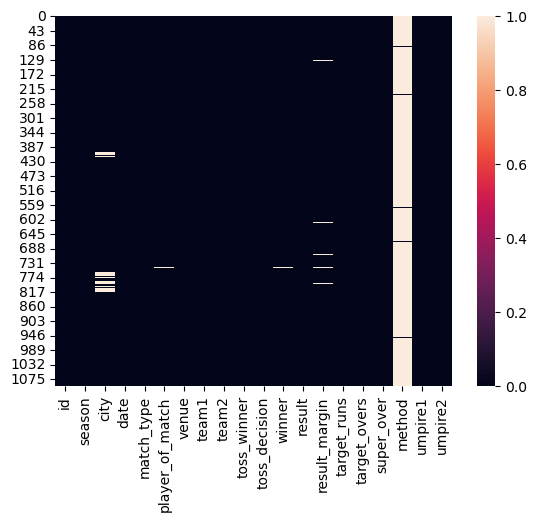

In [16]:
#heatmap
sns.heatmap(df_matches.isna())
plt.show()

In [17]:
#null values count
df_matches.isna().mean().sort_values(ascending=False)*100

method             98.082192
city                4.657534
result_margin       1.735160
player_of_match     0.456621
winner              0.456621
target_runs         0.273973
target_overs        0.273973
id                  0.000000
date                0.000000
season              0.000000
venue               0.000000
match_type          0.000000
toss_decision       0.000000
toss_winner         0.000000
team2               0.000000
team1               0.000000
result              0.000000
super_over          0.000000
umpire1             0.000000
umpire2             0.000000
dtype: float64

In [18]:
df_matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [19]:
df_matches['method'].fillna('Normal Method',inplace=True)

C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_7920\2862709222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['method'].fillna('Normal Method',inplace=True)


In [20]:
df_matches['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [21]:
df_matches[df_matches['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,Normal Method,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,Normal Method,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,Normal Method,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,Normal Method,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,Normal Method,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,Normal Method,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,Normal Method,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,Normal Method,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,Normal Method,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,Normal Method,Aleem Dar,VA Kulkarni


In [22]:
df_matches['city'].fillna('UAE',inplace=True)

C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_7920\4008184948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['city'].fillna('UAE',inplace=True)


In [23]:
df_matches.isna().mean().sort_values(ascending=False,inplace=True)

In [24]:
df_matches[df_matches['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,Normal Method,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,Normal Method,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,Normal Method,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,Normal Method,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,Normal Method,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,Normal Method,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,Normal Method,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,Normal Method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,Normal Method,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,Normal Method,AK Chaudhary,CB Gaffaney


In [25]:
df_matches['result_margin'].fillna(0,inplace=True)

C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_7920\4158405259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['result_margin'].fillna(0,inplace=True)


In [26]:
df_matches[df_matches['winner'].isna()]


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,0.0,NaN,NaN,N,Normal Method,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,NaN,NaN,N,Normal Method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,0.0,188.0,20.0,N,Normal Method,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,63.0,5.0,N,Normal Method,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,0.0,NaN,NaN,N,Normal Method,AK Chaudhary,NA Patwardhan


In [27]:
df_matches.fillna({'player of the match':'no player of the match','winner':'no winner of the match'},inplace=True)

In [28]:
df_matches[df_matches['winner'].isna()]


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2


In [29]:
df_matches.fillna(0,inplace=True)

In [30]:
df_matches.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

<Axes: >

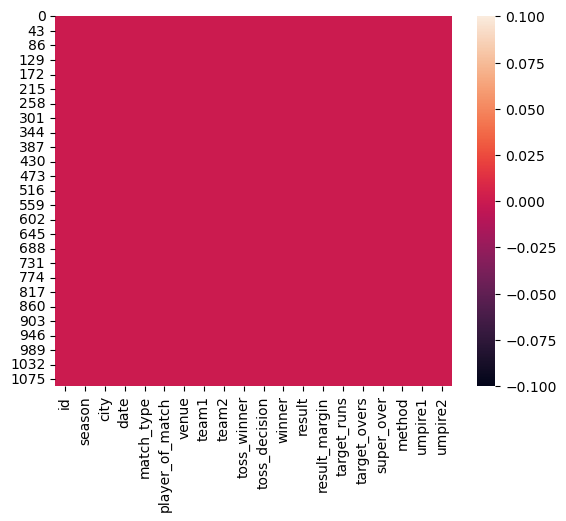

In [31]:
sns.heatmap(df_matches.isna())

In [32]:
df_matches['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
UAE                51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [33]:
data_rp = {'Navi Mumbai':'Mumbai',
           'Bengaluru':'Bangalore',
           'Sharjah':'UAE',
           'Abu Dhabi':'UAE','Kimberley':'Cape Town','Dubai':'UAE'}


df_matches.replace(data_rp,inplace = True)
print('Done')

Done


In [34]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [35]:
#check duplicacy
df_matches.duplicated('id').value_counts()

False    1095
Name: count, dtype: int64

In [36]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1095 non-null   float64
 15  target_overs     1095 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [37]:
df_matches['date']=pd.to_datetime(df_matches['date'])

In [38]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1095 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1095 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1095 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1095 non-null   float64       
 14  target_runs      1095 non-null   float64

In [39]:
df_matches['venue'].value_counts().index

Index(['Eden Gardens', 'Wankhede Stadium', 'M Chinnaswamy Stadium',
       'Feroz Shah Kotla', 'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Sawai Mansingh Stadium',
       'Dubai International Cricket Stadium', 'Wankhede Stadium, Mumbai',
       'Punjab Cricket Association Stadium, Mohali', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'MA Chidambaram Stadium, Chepauk, Chennai',
       'Narendra Modi Stadium, Ahmedabad',
       'Maharashtra Cricket Association Stadium',
       'Dr DY Patil Sports Academy, Mumbai', 'Dr DY Patil Sports Academy',
       'Brabourne Stadium, Mumbai', 'Subrata Roy Sahara Stadium',
       'Eden Gardens, Kolkata', 'Arun Jaitley Stadium, Delhi', 'Kingsmead',
       'M.Chinnaswamy Stadium', 'Rajiv Gandhi International Stadium',
       'Arun Jaitley Stadium',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'M Chinnaswamy Stadium, Bengaluru',
       'Rajiv Gandhi Internat

In [40]:
df_matches['venue'].str.split(',')

0                                 [M Chinnaswamy Stadium]
1           [Punjab Cricket Association Stadium,  Mohali]
2                                      [Feroz Shah Kotla]
3                                      [Wankhede Stadium]
4                                          [Eden Gardens]
                              ...                        
1090    [Rajiv Gandhi International Stadium,  Uppal,  ...
1091                  [Narendra Modi Stadium,  Ahmedabad]
1092                  [Narendra Modi Stadium,  Ahmedabad]
1093         [MA Chidambaram Stadium,  Chepauk,  Chennai]
1094         [MA Chidambaram Stadium,  Chepauk,  Chennai]
Name: venue, Length: 1095, dtype: object

In [41]:
df_matches['venue'].apply(lambda row:row.lower().split(','))

0                                 [m chinnaswamy stadium]
1           [punjab cricket association stadium,  mohali]
2                                      [feroz shah kotla]
3                                      [wankhede stadium]
4                                          [eden gardens]
                              ...                        
1090    [rajiv gandhi international stadium,  uppal,  ...
1091                  [narendra modi stadium,  ahmedabad]
1092                  [narendra modi stadium,  ahmedabad]
1093         [ma chidambaram stadium,  chepauk,  chennai]
1094         [ma chidambaram stadium,  chepauk,  chennai]
Name: venue, Length: 1095, dtype: object

In [42]:
df_matches['venue'].apply(lambda row:row.title().split(',')[0])

0                    M Chinnaswamy Stadium
1       Punjab Cricket Association Stadium
2                         Feroz Shah Kotla
3                         Wankhede Stadium
4                             Eden Gardens
                       ...                
1090    Rajiv Gandhi International Stadium
1091                 Narendra Modi Stadium
1092                 Narendra Modi Stadium
1093                Ma Chidambaram Stadium
1094                Ma Chidambaram Stadium
Name: venue, Length: 1095, dtype: object

In [43]:
df_matches['venue'].value_counts()

venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narend

In [44]:
df_matches['venue'].value_counts().reset_index()

,venue,count
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,65
3,Feroz Shah Kotla,60
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,Sawai Mansingh Stadium,47
7,Dubai International Cricket Stadium,46
8,"Wankhede Stadium, Mumbai",45
9,"Punjab Cricket Association Stadium, Mohali",35


NameError: name 'ax' is not defined

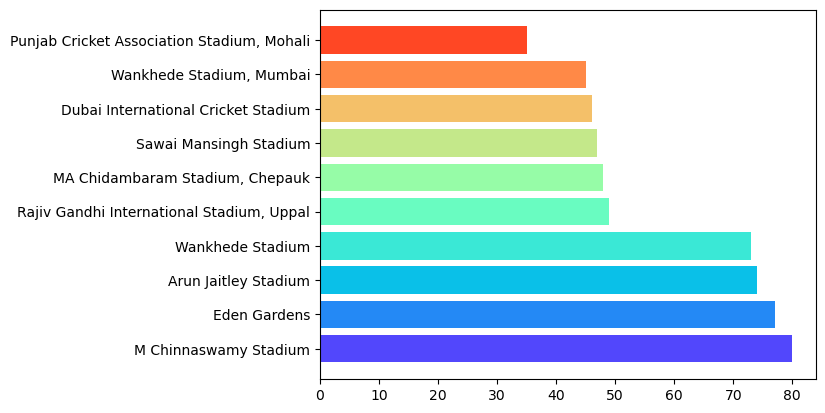

In [45]:
data_v_rp = {'M.Chinnaswamy Stadium':'M Chinnaswamy Stadium',
             'Feroz Shah Kotla':'Arun Jaitley Stadium',
             'Sardar Patel Stadium':'Narendra Modi Stadium',
             'Punjab Cricket Association Is Bindra Stadium':'Punjab Cricket Association Stadium'}
df_matches['venue'].replace(data_v_rp,inplace=True)
venue_name=df_matches['venue'].value_counts().head(10).index
venue_values=df_matches['venue'].value_counts().head(10).values
plt.barh(venue_name,venue_values,color=sns.color_palette('rainbow',10))
plt.bar_label(ax)
plt.title("top 10 venues by matches played")
plt.xticks(rotation=90)
plt.show()


